<a href="https://colab.research.google.com/github/Lekanville/Text-Line-Handwriting-Classification/blob/main/SVM_and_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [ ]:
from numpy import save
from numpy import load

In [ ]:
data = load('drive/MyDrive/Colab_Notebooks/Handwriting_Classification/data.npy')

In [ ]:
labels = load('drive/MyDrive/Colab_Notebooks/Handwriting_Classification/labels.npy')

(-0.5, 255.5, 31.5, -0.5)

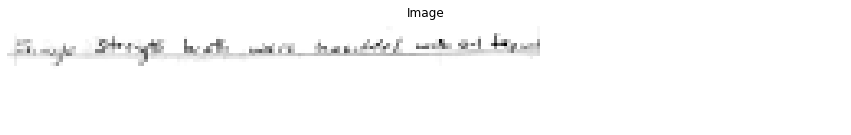

In [ ]:
plt.figure(figsize=(15, 2))
plt.imshow(data[1881], cmap = 'gray')
plt.title('Image', fontsize=12)
plt.axis('off')

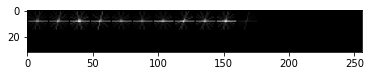

In [ ]:
hog_features, hog_image = hog(data[1881],
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(hog_image, cmap=mpl.cm.gray)

In [ ]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to greyscale
    #grey_image = rgb2grey(img)
    # get HOG features from greyscale image
    hog_features = hog(img, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack([color_features, hog_features])
    return flat_features

bombus_features = create_features(data[1881])

print(bombus_features)

[1. 1. 1. ... 1. 1. 1.]


In [ ]:
def create_feature_matrix(label_dataframe):
    features_list = []
    
    for img in label_dataframe:
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(data)

In [ ]:
feature_matrix

array([[0.99215686, 0.99705882, 0.98823529, ..., 1.        , 1.        ,
        1.        ],
       [0.98823529, 0.97058824, 0.60294118, ..., 1.        , 1.        ,
        1.        ],
       [0.98235294, 0.97254902, 0.97254902, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
save('drive/MyDrive/Colab_Notebooks/Handwriting_Classification/feature_matrix.npy', feature_matrix)

'feature_matrix)' was not found in history, as a file, url, nor in the user namespace.


In [ ]:
labels = load('drive/MyDrive/Colab_Notebooks/Handwriting_Classification/labels.npy')

In [ ]:
feature_matrix = load('drive/MyDrive/Colab_Notebooks/Handwriting_Classification/feature_matrix.npy')

In [ ]:
feature_matrix.shape

(18820, 8192)

In [ ]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
pca_features = pca.fit_transform(feature_matrix)
# look at new shape
print('PCA matrix shape is: ', pca_features.shape)

Feature matrix shape is:  (18820, 8192)
PCA matrix shape is:  (18820, 500)


In [ ]:
X = pca_features
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
svc_model = SVC(probability = True)

In [ ]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
X_test

array([[ 1.51628886e+00, -2.41578837e+00,  1.00157512e+00, ...,
        -1.89807496e-01, -1.38033604e-01, -1.68995681e-01],
       [-1.96867600e+00, -1.91819874e-01,  3.92415166e-01, ...,
        -9.83310903e-03, -1.13288830e-04,  3.42196657e-02],
       [-5.45062832e-01, -8.10451647e-01, -1.34965783e+00, ...,
        -8.48269308e-02, -1.27057685e-01, -1.12136726e-01],
       ...,
       [ 3.03482173e+00,  4.78371341e+00,  5.42391587e+00, ...,
         3.56185255e-01, -2.74821728e-01,  1.48409701e-01],
       [ 1.63154057e+00,  1.66480305e+00, -5.93860292e-01, ...,
         1.41902437e-01, -2.20332019e-01, -1.06235321e-01],
       [-8.45516164e-01,  6.14627454e-01, -5.15915499e-01, ...,
        -3.21384337e-02,  5.13353306e-03, -4.81425744e-02]])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 86   9   9   5   2   0  10   2   4   0]
 [  8 172  13   3   5   1   5   6   2   1]
 [  2   3 183  10   0   0   5   1   2   4]
 [  1   3  11 139   1   0   5   0   8  21]
 [  2   5   2   1 164   4   0   0   1   8]
 [  2   7   4   2  26 102   2   2   2   2]
 [  2   2  13   7   0   2 177  10   9   2]
 [  1   5   3   3   1   1  15 167   3   4]
 [  0   2   0   5   0   0   4   4 122  45]
 [  1   0   0   7   1   0   0   2  13 169]]


              precision    recall  f1-score   support

           1       0.82      0.68      0.74       127
           2       0.83      0.80      0.81       216
           3       0.77      0.87      0.82       210
           4       0.76      0.74      0.75       189
           5       0.82      0.88      0.85       187
           6       0.93      0.68      0.78       151
           7       0.79      0.79      0.79       224
           8       0.86      0.82      0.84       203
           9       0.73      0.67      0.70       182
          10       0.66   

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.7869287991498406


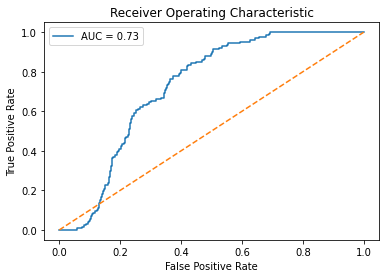

In [ ]:
# predict probabilities for X_test using predict_proba
probabilities = svc_model.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
y_test

array([1, 9, 9, ..., 5, 7, 8])

XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xg_model = xgb.XGBClassifier(objective='multi:softmax', gamma = 0.5, max_delta_step = 0.1, learning_rate = 0.01, max_depth = 4, min_child_weight=0.2, nthread=4, reg_alpha = 0.5,
                             n_estimators = 10, reg_lambda=0.8, scale_pos_weight = 1, silent = False, subsample = 0.8)

In [ ]:
xg_model = xgb.XGBClassifier(objective='multi:softmax', probability = True)

In [ ]:
xg_model.fit(X_train,y_train)

xg_pred = xg_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, xg_pred))
print('\n')
print(classification_report(y_test, xg_pred))

[[ 59  20  16   6   5   1   9   2   9   0]
 [ 17 142  10   4  10   2  10  13   6   2]
 [  3   2 164  11   1   1  14   2   6   6]
 [  0   1   9 137   0   0   5   1  11  25]
 [  3  11   9   2 139  10   4   1   0   8]
 [  2   9  10   3  37  80   2   2   3   3]
 [  5   2  20  12   3   1 131  34  14   2]
 [  7   3   2   5   3   1  30 144   2   6]
 [  1   2   2   9   0   0   6   1 109  52]
 [  0   0   0  10   1   0   0   2  20 160]]


              precision    recall  f1-score   support

           1       0.61      0.46      0.53       127
           2       0.74      0.66      0.70       216
           3       0.68      0.78      0.73       210
           4       0.69      0.72      0.71       189
           5       0.70      0.74      0.72       187
           6       0.83      0.53      0.65       151
           7       0.62      0.58      0.60       224
           8       0.71      0.71      0.71       203
           9       0.61      0.60      0.60       182
          10       0.61   

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16938, 500)
(1882, 500)
(16938,)
(1882,)


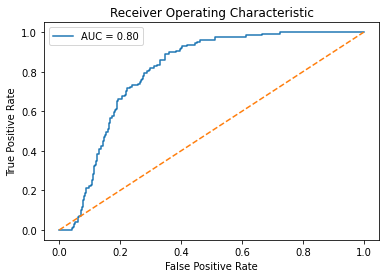

In [ ]:
# predict probabilities for X_test using predict_proba
xgb_prob = xg_model.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = xgb_prob[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

Another Feature extraction

In [ ]:
import cv2
import mahotas

In [ ]:
def fd_hu_moments(image):
    features_list_hu_moments = []
    for img in image:
      features = cv2.HuMoments(cv2.moments(img)).flatten()
      features_list_hu_moments.append(features)

    return features_list_hu_moments

def fd_haralick(image):
    features_list_fd_haralick = []
    for img in image:
      haralick = mahotas.features.haralick(img).mean(axis=0)
      features_list_fd_haralick.append(haralick)
    return features_list_fd_haralick
 
def fd_histogram(image, mask=None):
    fd_histogram = []

    for img in image:

      # convert the image to HSV color-space
      img= cat(3, zeros(size(img)), zeros(size(img)), double(img));
      # compute the color histogram
      hist  = cv2.calcHist([img], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
      # normalize the histogram
      cv2.normalize(hist, hist)
      fd_histogram.append(hist.flatten())
    return fd_histogram


In [ ]:
global_feature = np.hstack([fd_histogram(data), fd_hu_moments(data)])
scaler = MinMaxScaler(feature_range=(0, 1))
#Normalize The feature vectors...
rescaled_features = scaler.fit_transform(global_features)

NameError: ignored

In [ ]:
global_feature.shape

(18820, 7)

In [ ]:
pip install pyqt4

ERROR: Could not find a version that satisfies the requirement pyqt4 (from versions: none)
ERROR: No matching distribution found for pyqt4


In [ ]:
data

array([[[0.99215686, 0.99705882, 0.98823529, ..., 1.        ,
         1.        , 1.        ],
        [0.99411765, 0.99313725, 0.99705882, ..., 1.        ,
         1.        , 1.        ],
        [0.98627451, 0.99313725, 0.99607843, ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[0.98823529, 0.97058824, 0.60294118, ..., 1.        ,
         1.        , 1.        ],
        [0.97058824, 0.99705882, 0.96078431, ..., 1.        ,
         1.        , 1.        ],
        [0.97647059, 0.97745098, 0.97647059, ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1. 

AUR-ROC for Muliticlass Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
clf = OneVsRestClassifier(SVC(probability = True))

In [ ]:
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[ 88   8  10   7   2   1   8   2   1   0]
 [ 12 165  12   1  11   4   3   5   2   1]
 [  1   1 191   7   0   0   4   1   0   5]
 [  0   3  10 140   0   0   3   3   5  25]
 [  1   1   6   1 166   3   0   1   2   6]
 [  1   2   5   2  28 104   2   2   2   3]
 [  2   6  11  10   0   2 162  24   4   3]
 [  2   2   0   2   2   2   8 182   0   3]
 [  0   1   2   3   0   0   3   0 122  51]
 [  1   0   1   7   0   0   1   2   9 172]]


              precision    recall  f1-score   support

           1       0.81      0.69      0.75       127
           2       0.87      0.76      0.81       216
           3       0.77      0.91      0.83       210
           4       0.78      0.74      0.76       189
           5       0.79      0.89      0.84       187
           6       0.90      0.69      0.78       151
           7       0.84      0.72      0.78       224
           8       0.82      0.90      0.86       203
           9       0.83      0.67      0.74       182
          10       0.64   

In [ ]:
pred_prob = clf.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


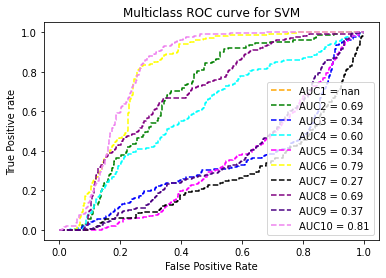

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 10
roc_auc = []
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
    # calculate AUC
    roc_auc.append(auc(fpr[i], tpr[i]))

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='AUC1 = {:0.2f}'.format(roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='AUC2 = {:0.2f}'.format(roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='AUC3 = {:0.2f}'.format(roc_auc[2]))
plt.plot(fpr[3], tpr[3], linestyle='--',color='cyan', label='AUC4 = {:0.2f}'.format(roc_auc[3]))
plt.plot(fpr[4], tpr[4], linestyle='--',color='magenta', label='AUC5 = {:0.2f}'.format(roc_auc[4]))
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='AUC6 = {:0.2f}'.format(roc_auc[5]))
plt.plot(fpr[6], tpr[6], linestyle='--',color='black', label='AUC7 = {:0.2f}'.format(roc_auc[6]))
plt.plot(fpr[7], tpr[7], linestyle='--',color='purple', label='AUC8 = {:0.2f}'.format(roc_auc[7]))
plt.plot(fpr[8], tpr[8], linestyle='--',color='indigo', label='AUC9 = {:0.2f}'.format(roc_auc[8]))
plt.plot(fpr[9], tpr[9], linestyle='--',color='violet', label='AUC10 = {:0.2f}'.format(roc_auc[9]))
plt.title('Multiclass ROC curve for SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [ ]:
SVM = {'Algorithm':'SVM','Accuracy':0.79}
XGBoost = {'Algorithm':'XGB','Accuracy':0.67}
DNN = {'Algorithm':'DNN','Accuracy':0.71}
CNN = {'Algorithm':'CNN','Accuracy':0.90}

In [ ]:
DNN.keys()

dict_keys(['Algorithm', 'Accuracy'])

In [ ]:
results = pd.DataFrame([SVM, XGBoost, DNN, CNN], columns = DNN.keys())

In [ ]:
results

,Algorithm,Accuracy
0,SVM,0.79
1,XGB,0.67
2,DNN,0.71
3,CNN,0.90


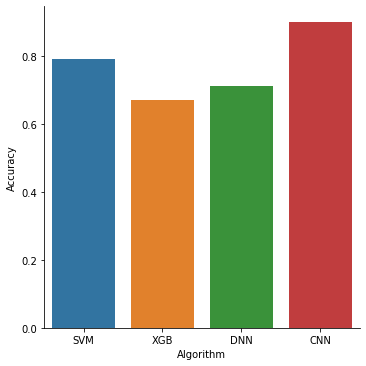

In [ ]:
sns.catplot(x="Algorithm", y ="Accuracy", data= results, kind = "bar")